# Exploratory Data Analysis
![Image about EDA](https://latize.com/wp-content/uploads/2017/11/business_advantages_of_data_analysis.jpg)

Second step of an analytics project is to perfrom Exploratory Analysis so that we can better understand the dataset by observing `trends` and `relationships` within variables and between variables with the aid of `visual charts`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme()

## 1) Import Cleaned and Processed dataset into the notebook

In [27]:
job_eda_df = pd.read_csv('datasets/fake_job_postings_eda.csv')
job_model_df = pd.read_csv('datasets/fake_job_postings_model.csv')

## 2) EDA using `job_eda_df`

### 2.1 Overview of dataset

#### 2.1.1 Overview of dataframe

In [28]:
job_eda_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Not Applicable,Unknown,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Applicable,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### 2.1.2 Predictor and Response Variables

In [31]:
job_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

The `job_eda_df` dataset contains

**11 categorical predictor variables:**
- location
- department
- salary_range
- telecommuting
- has_company_logo
- has_questions
- employment_type
- required_experience
- required_education
- industry
- function

**4 text predictor variables:**
- title
- description
- requirements
- benefits

**And 1 categorical response variable:**
- fraudulent

### 2.2 Response Variable - `fraudulent`

The distribution of the target variable, `fraudulent` is as follows:

Total number of postings:  17880
	Number of fraudulent postings:  17014
	Number of non-fraudulent postings:  866
Percentage of fraudulent postings: 95.16%
Percentage of non-fraudulent postings: 4.84%


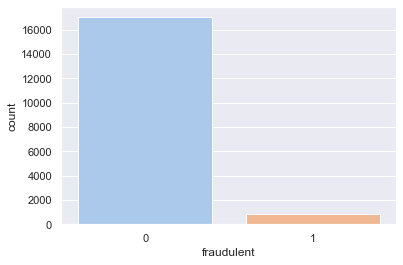

In [29]:
sb.countplot(data = job_eda_df, x ="fraudulent", palette='pastel')

total_listings = len(job_eda_df)
number_of_fraudulent_postings = job_eda_df["fraudulent"].value_counts()[0]
number_of_non_fraudulent_postings = job_eda_df["fraudulent"].value_counts()[1]

print("Total number of postings: ", total_listings)
print("\tNumber of fraudulent postings: ", number_of_fraudulent_postings)
print("\tNumber of non-fraudulent postings: ", number_of_non_fraudulent_postings)
print(f"Percentage of fraudulent postings: {round(number_of_fraudulent_postings/total_listings * 100, 2)}%")
print(f"Percentage of non-fraudulent postings: {round(number_of_non_fraudulent_postings/total_listings * 100, 2)}%")

From the plot and percentanges above, it can be seen that the dataset is unbalanced, with majority of the job postings (95.16%) to be non-fraudulent

### 2.3 Categorical Predictor Variables

`Categorical`: location, department, salary_range, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function

#### 2.3.0 Helper function to plot categorical count plots (X vs fraudulent)

In [434]:
'''
X: string -> The Categorical Predictor Variable
limit: int -> The maximum number of unique 'X' you want to show (e.g.: limit=10 shows the top 10 unique 'X' for each generated graphs)
figsize -> Set the figure size of the generated plot
numericX: bool -> Whether 'X' is a numeric categorical variable (integer encoded); e.g.: X is 0 or 1
'''
def plotCategoricalCountPlot(X, limit=10, figsize=(20, 25), numericX=False):
  # get the order of unique values to be displayed on the X axis, in descending order
  top10_all = list(job_eda_df[X].value_counts()[0:limit].index)
  top10_fraudulent = list(job_eda_df[job_eda_df["fraudulent"] == 1][X].value_counts()[0:limit].index)
  top10_non_fraudulent = list(job_eda_df[job_eda_df["fraudulent"] == 0][X].value_counts()[0:limit].index)

  # When X is integer encoded
  if numericX:
    top10_all = top10_fraudulent = top10_non_fraudulent = sorted(job_eda_df[X].unique())

  # Setting the dimensions of the plot and number of subplots
  fig, axs = plt.subplots(4, figsize=figsize)
  
  # Setting subplots titles
  axs[0].set_title(f"Top {limit} \"{X}\" with non-fradulent job postings")
  axs[1].set_title(f"Top {limit} \"{X}\" with fradulent job postings")
  axs[2].set_title(f"Top {limit} \"{X}\" with fradulent job postings order (All)")
  axs[3].set_title(f"Top {limit} \"{X}\" (All)")

  # Drawing the plot
  subAx1 = sb.countplot(x=job_eda_df[job_eda_df["fraudulent"] == 0][X], order=top10_non_fraudulent, color="lightgreen", ax=axs[0])
  subAx2 = sb.countplot(x=job_eda_df[job_eda_df["fraudulent"] == 1][X], order=top10_fraudulent, color="lightsalmon", ax=axs[1])
  subAx3 = sb.countplot(x=job_eda_df[X], hue=job_eda_df['fraudulent'], order=top10_fraudulent, palette=["lightgreen", "lightsalmon"], ax=axs[2])
  subAx4 = sb.countplot(x=job_eda_df[X], hue=job_eda_df['fraudulent'], order=top10_all, palette=["lightgreen", "lightsalmon"], ax=axs[3])

  # Annotating countplot with percentages for the plot that includes both "fraudulent" catergorical values
  annotatePlotWithPercentage(subAx1, len(job_eda_df[job_eda_df["fraudulent"] == 0]))
  annotatePlotWithPercentage(subAx2, len(job_eda_df[job_eda_df["fraudulent"] == 1]))
  annotatePlotWithHuePercentage(subAx3, limit)
  annotatePlotWithHuePercentage(subAx4, limit)


# For plotting the count of each categories
def plotBasicCategoricalCountPlot(X, figsize=(5, 5)):
  # Setting the dimensions of the plot and number of subplots
  fig, ax = plt.subplots(figsize=figsize)

  # Setting subplots titles
  ax.set_title(f"{X} vs count")

  # Drawing the plot
  subAx = sb.countplot(x=job_eda_df[X], color="lightblue")

  annotatePlotWithPercentage(subAx, len(job_eda_df))


# -------------------- Annotate Functions -------------------- #
def annotatePlotWithPercentage(subAx, total_count):
  index = 0
  for patch in subAx.patches:
    current_count = 0
    percentage = 0

    if not np.isnan(patch.get_height()):
      current_count = patch.get_height()
      percentage = f'{100 * current_count / total_count:.1f}%\n'
    
    # Annotate with percentage of current total count
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    subAx.annotate(percentage, (x, y), ha='center', va='center')

    index += 1


def annotatePlotWithHuePercentage(subAx, limit):
  index = 0
  for patch in subAx.patches:
    fraudulent_count, non_fraudulent_count, current_total_count = 0, 0, 0
    percentage = 0

    # Current index is for Non-Fraudulent
    if index < limit and not np.isnan(patch.get_height()):
      non_fraudulent_count = subAx.patches[index].get_height()
      fraudulent_count = subAx.patches[index+limit].get_height() if not np.isnan(subAx.patches[index+limit].get_height()) else 0
      current_total_count =  fraudulent_count + non_fraudulent_count
      
      percentage = f'{100 * non_fraudulent_count / current_total_count:.1f}%\n'
    # Current index is for Fraudulent
    elif index >= limit and not np.isnan(patch.get_height()):
      fraudulent_count = subAx.patches[index].get_height()
      non_fraudulent_count = subAx.patches[index-limit].get_height() if not np.isnan(subAx.patches[index-limit].get_height()) else 0
      current_total_count =  fraudulent_count + non_fraudulent_count

      percentage = f'{100 * fraudulent_count / current_total_count:.1f}%\n'
    
    # Annotate with percentage of current total count
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    subAx.annotate(percentage, (x, y), ha='center', va='center')

    index += 1

#### 2.3.1 Location

In [314]:
print("Number of unique values:", job_eda_df["location"].nunique())

Number of unique values: 3106


Since there are 3106 unique values of `location`, we will only see the top 10 in terms of frequency.

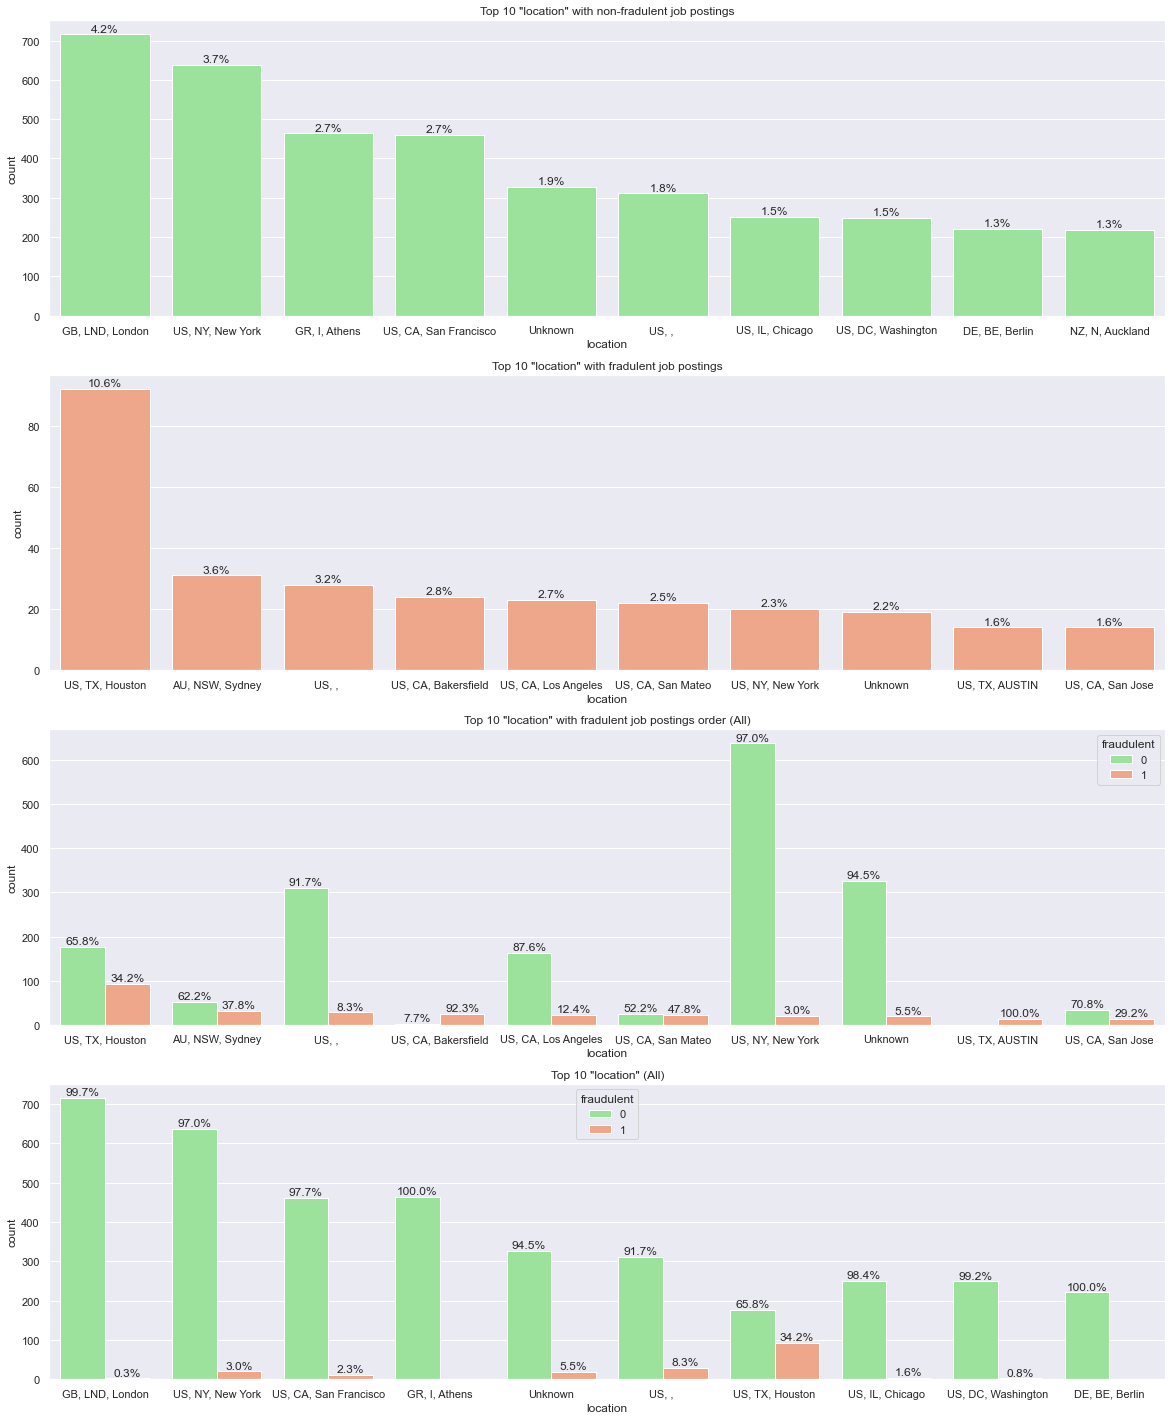

In [435]:
plotCategoricalCountPlot("location", limit=10)

**Observations:**
- Most of the job listings are from `US, TX, Houston` (10.6%)
- Job listings from `US, CA, Bakersfield` and `US, TX, AUSTIN` have a very high chance of being a scam (100% and 92.3%)
- Job listings from `GB, LND, London` has an extremely low chance of being a scam (99.7%)

#### 2.3.2 Department

In [315]:
print("Number of unique values:", job_eda_df["department"].nunique())

Number of unique values: 1337


Since there are 1337 unique values of `department`, we will only see the top 10 in terms of frequency.

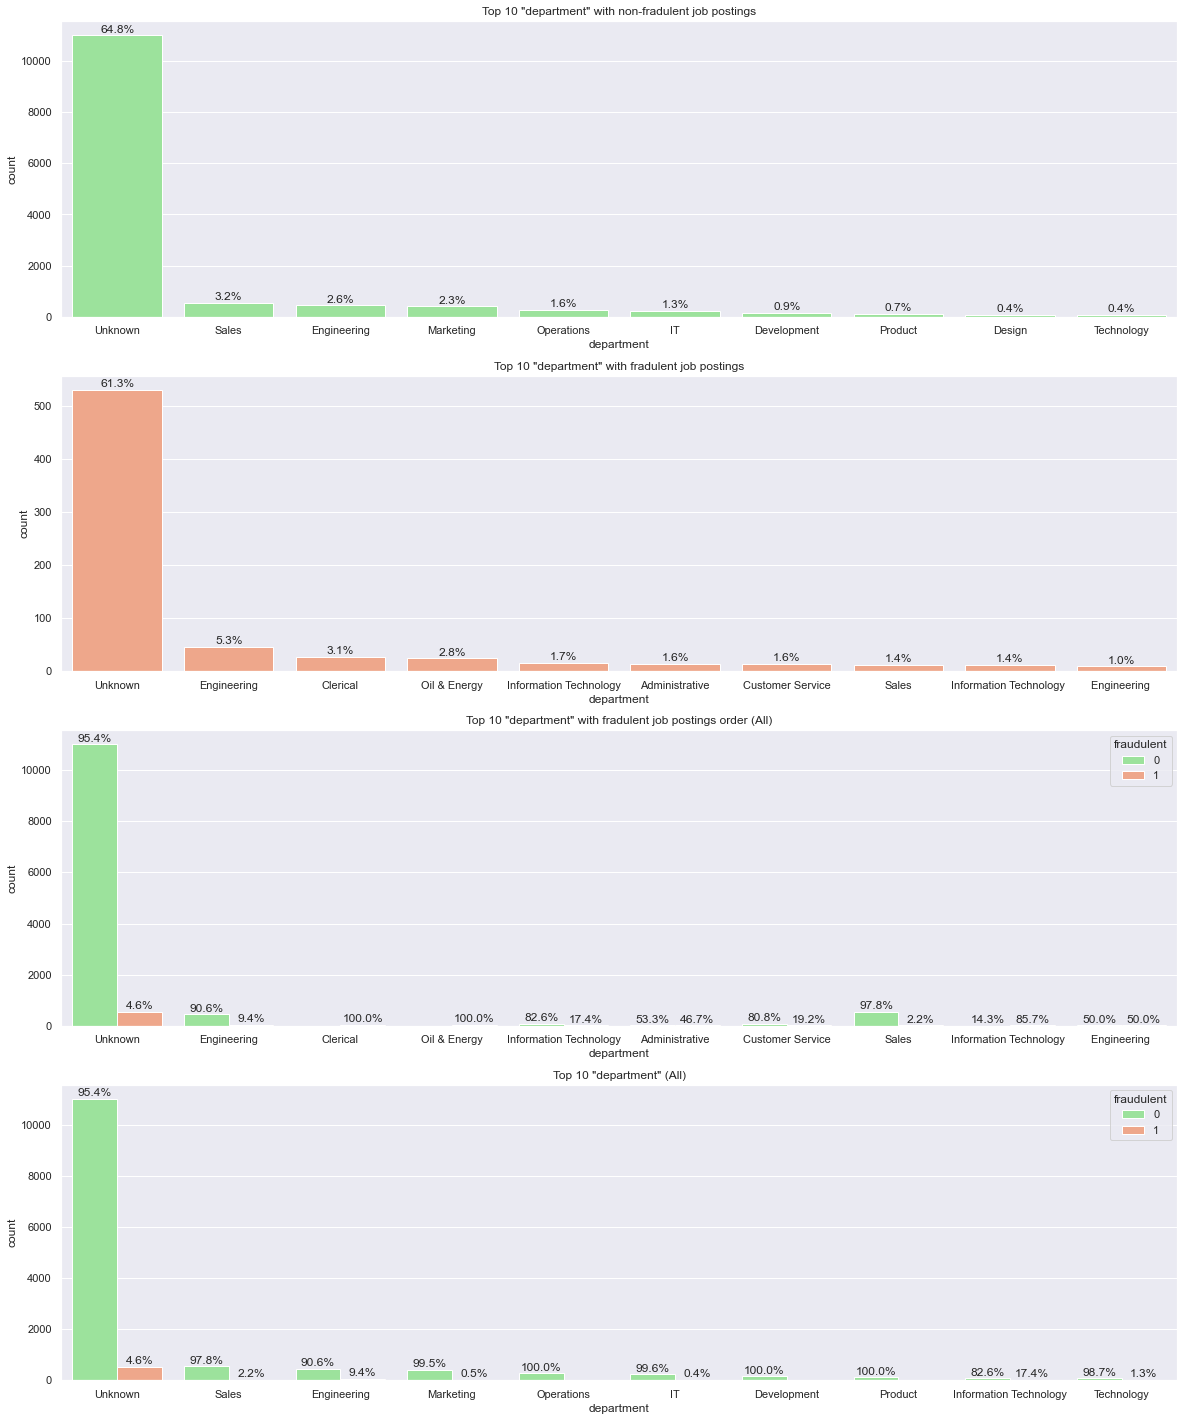

In [436]:
plotCategoricalCountPlot("department", limit=10)

**Observations:**
- Most of the job listings have `Unknown` departments regardless of whether it is fraudulent or not (~60%)
- A sizable number of job listings have `Engineering` department (5.3%) (excluding `Unknown` department)
- Job listings with `Clerical` and `Oil & Energy` departments have a very high chance of being a scam (both 100%)
- Job listings with `Unkwown` departments suprisingly has a low chance of being a scam (95.4%)

#### 2.3.3 Salary Range

In [316]:
print("Number of unique values:", job_eda_df["salary_range"].nunique())

Number of unique values: 875


Since there are 875 unique values of `salary_range`, we will only see the top 10 in terms of frequency.

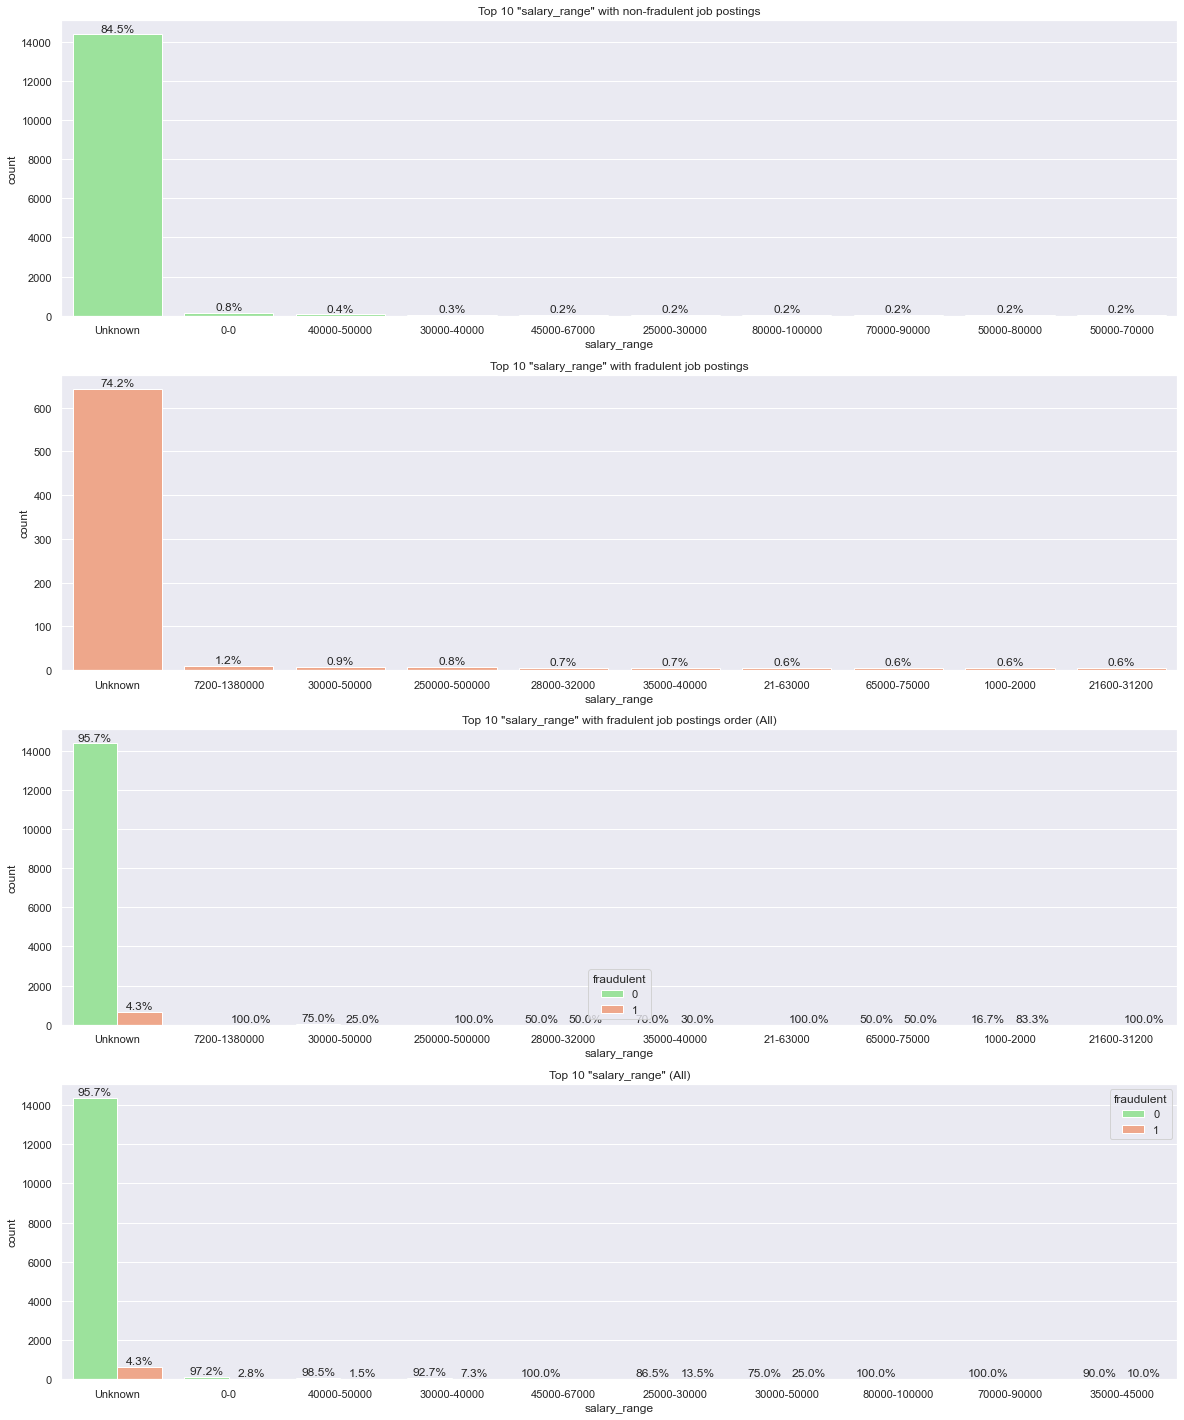

In [437]:
plotCategoricalCountPlot("salary_range", limit=10)

**Observations:**
- Most of the job listings have `Unknown` salary range regardless of whether it is fraudulent or not (~80%)
- Job listings with large salary range of `7200-1380000` and `250000-50000` salary range have a very high chance of being a scam (both 100%)
- Job listings with `Unkwown` and `0-0` salary range suprisingly has a low chance of being a scam (95.7% and 97.2%)

#### 2.3.4 Telecommuting

In [317]:
print("Number of unique values:", job_eda_df["telecommuting"].nunique())

Number of unique values: 2


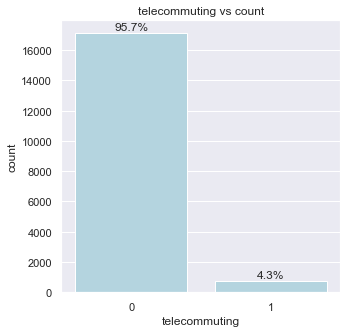

In [430]:
plotBasicCategoricalCountPlot("telecommuting")

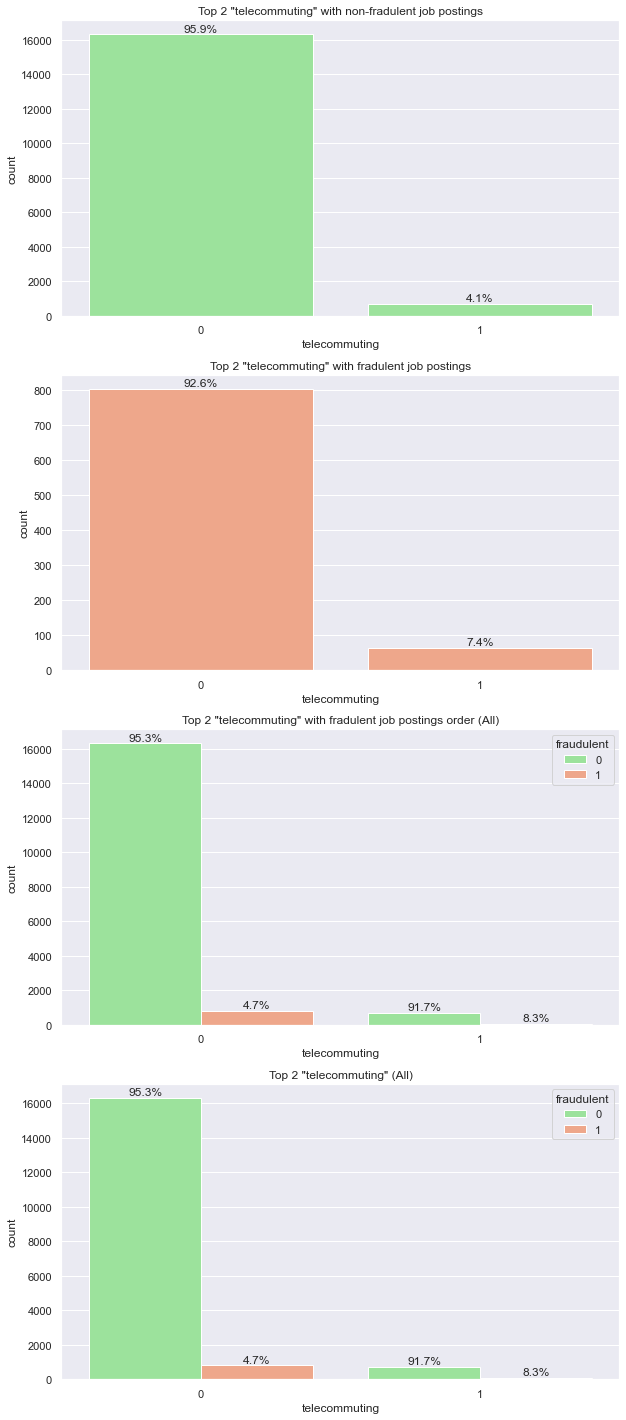

In [438]:
plotCategoricalCountPlot("telecommuting", limit=2, figsize=(10, 25), numericX=True)

**Observations:**
- Most of the job listings does not have `telecommuting` (95.7%)
- A job listing that has `telecommuting` is about 2 times more likely to be a scam compared to a job listing without `telecommuting` (8.3% vs 4.7%)

#### 2.3.5 Has Company Logo

In [318]:
print("Number of unique values:", job_eda_df["has_company_logo"].nunique())

Number of unique values: 2


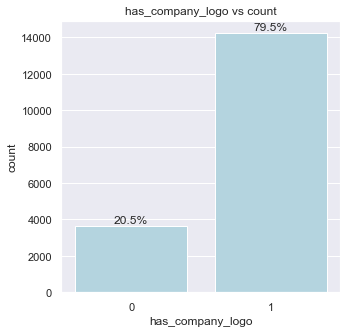

In [431]:
plotBasicCategoricalCountPlot("has_company_logo")

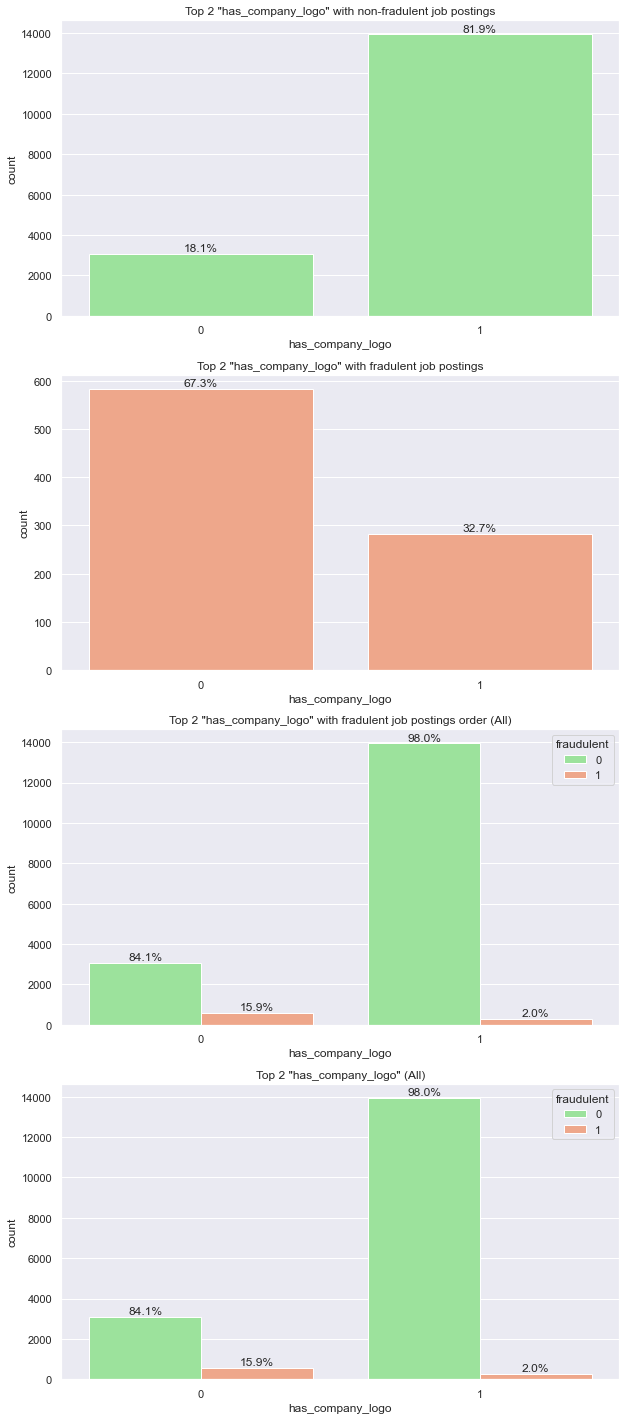

In [439]:
plotCategoricalCountPlot("has_company_logo", limit=2, figsize=(10, 25), numericX=True)

**Observations:**
- Most of the job listings `has a company logo` (79.5%)
- Most of the job listings that are not fraudulent `has a company logo` (67.3%)
- Most of the job listings that are fraudulent `does not have a company logo` (81.9%)
- A job listing that `does not have a company logo` has a significantly higher chance of being a scam compared to that that `has a company logo` (15.9% vs 2.0%)

#### 2.3.6 Has questions

In [319]:
print("Number of unique values:", job_eda_df["has_questions"].nunique())

Number of unique values: 2


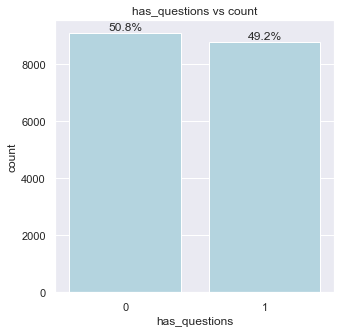

In [442]:
plotBasicCategoricalCountPlot("has_questions")

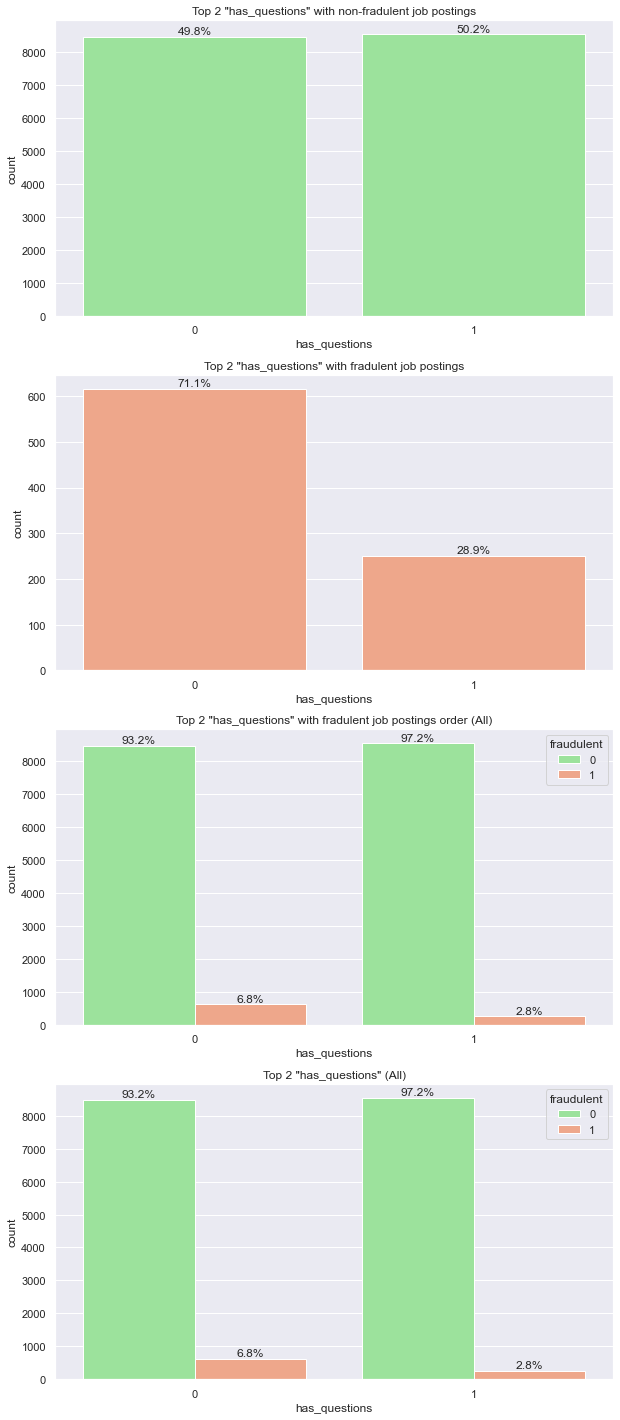

In [441]:
plotCategoricalCountPlot("has_questions", limit=2, figsize=(10, 25), numericX=True)

**Observations:**
- There is an even distribution of `has_question` for fraudulent and non-fraudulent job listings.
- A job listing that `does not have question` is about 2.5 times more likely to be a scam compared to that that `has_question` (6.8% vs 2.8%)

#### 2.3.7 Employment Type

In [320]:
print("Number of unique values:", job_eda_df["employment_type"].nunique())

Number of unique values: 6


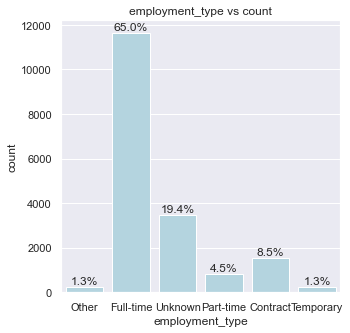

In [443]:
plotBasicCategoricalCountPlot("employment_type")

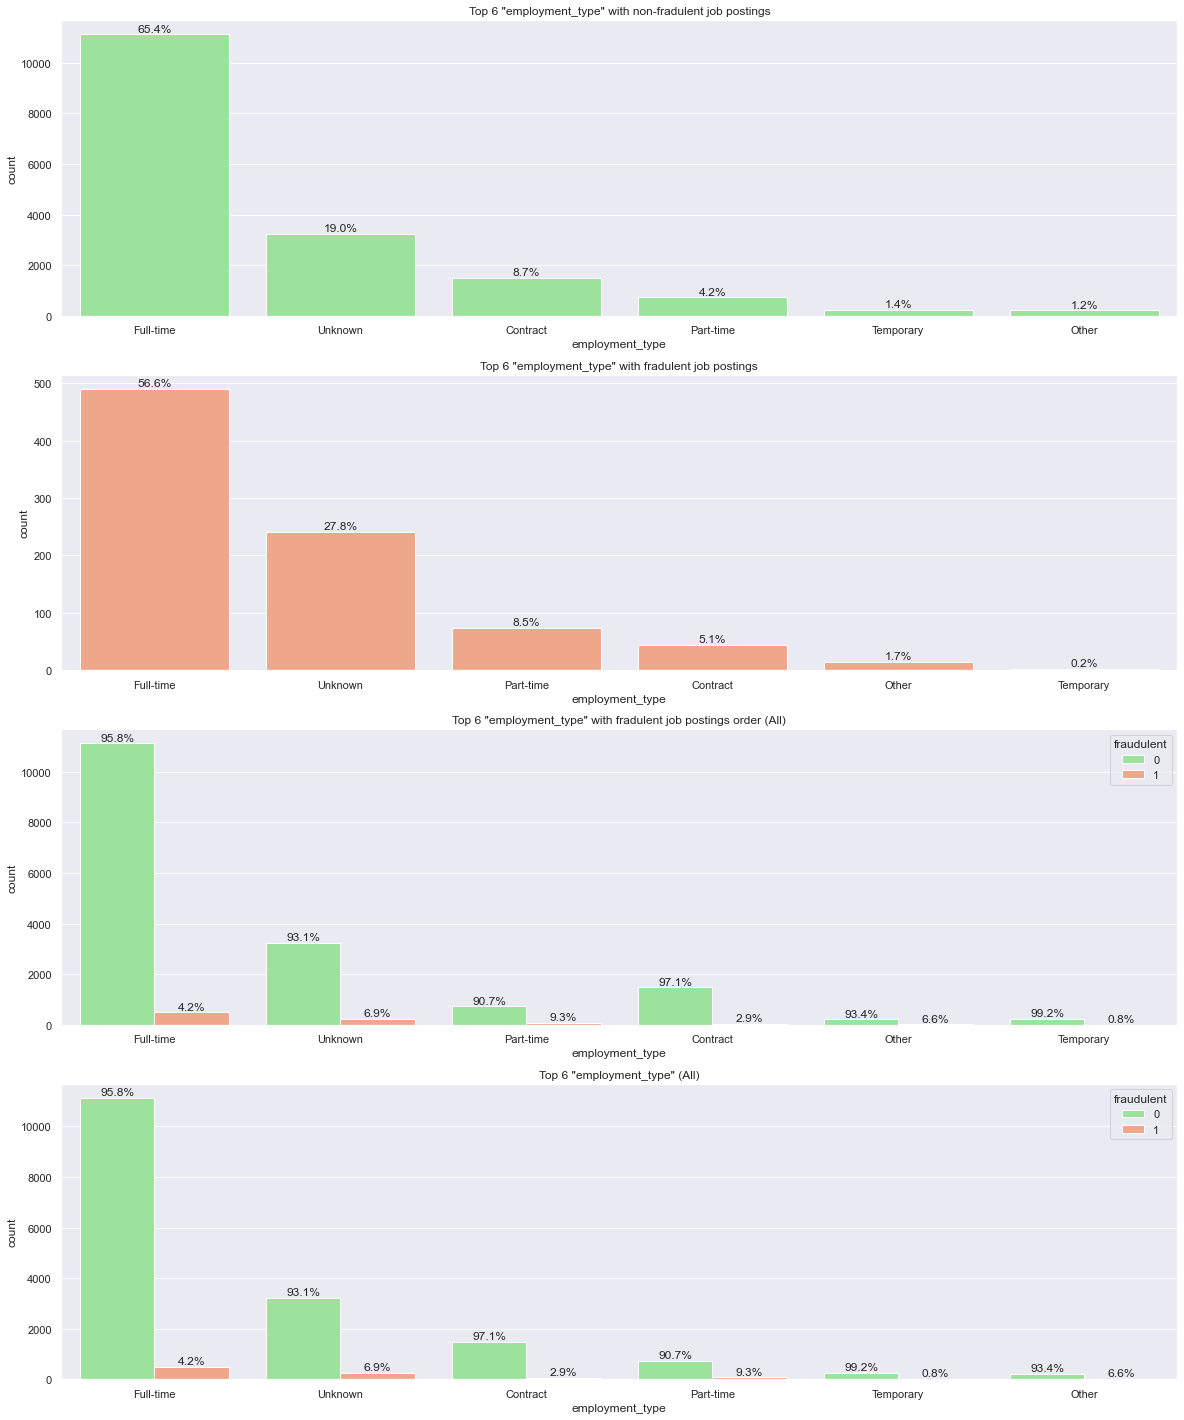

In [444]:
plotCategoricalCountPlot("employment_type", limit=6)

**Observations:**
- Most of the job listings has an employment type of `Full-time`.
- Job listings with employment types of `Part-time` and `Unknown` have significantly have chance of being a scam (9.3% and 6.9%).

#### 2.3.8 Required Experience

In [321]:
print("Number of unique values:", job_eda_df["required_experience"].nunique())

Number of unique values: 7


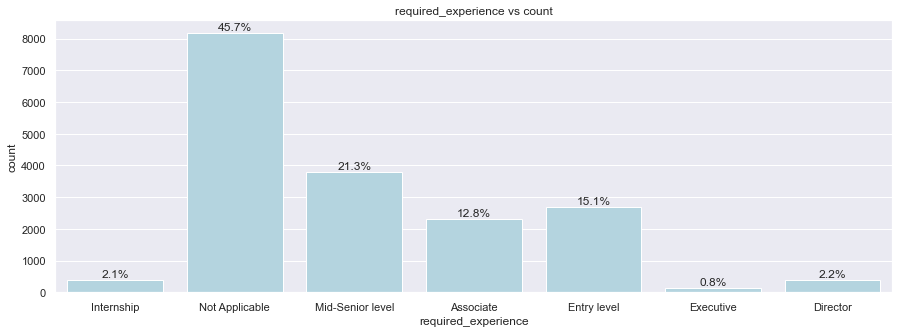

In [447]:
plotBasicCategoricalCountPlot("required_experience", figsize=(15, 5))

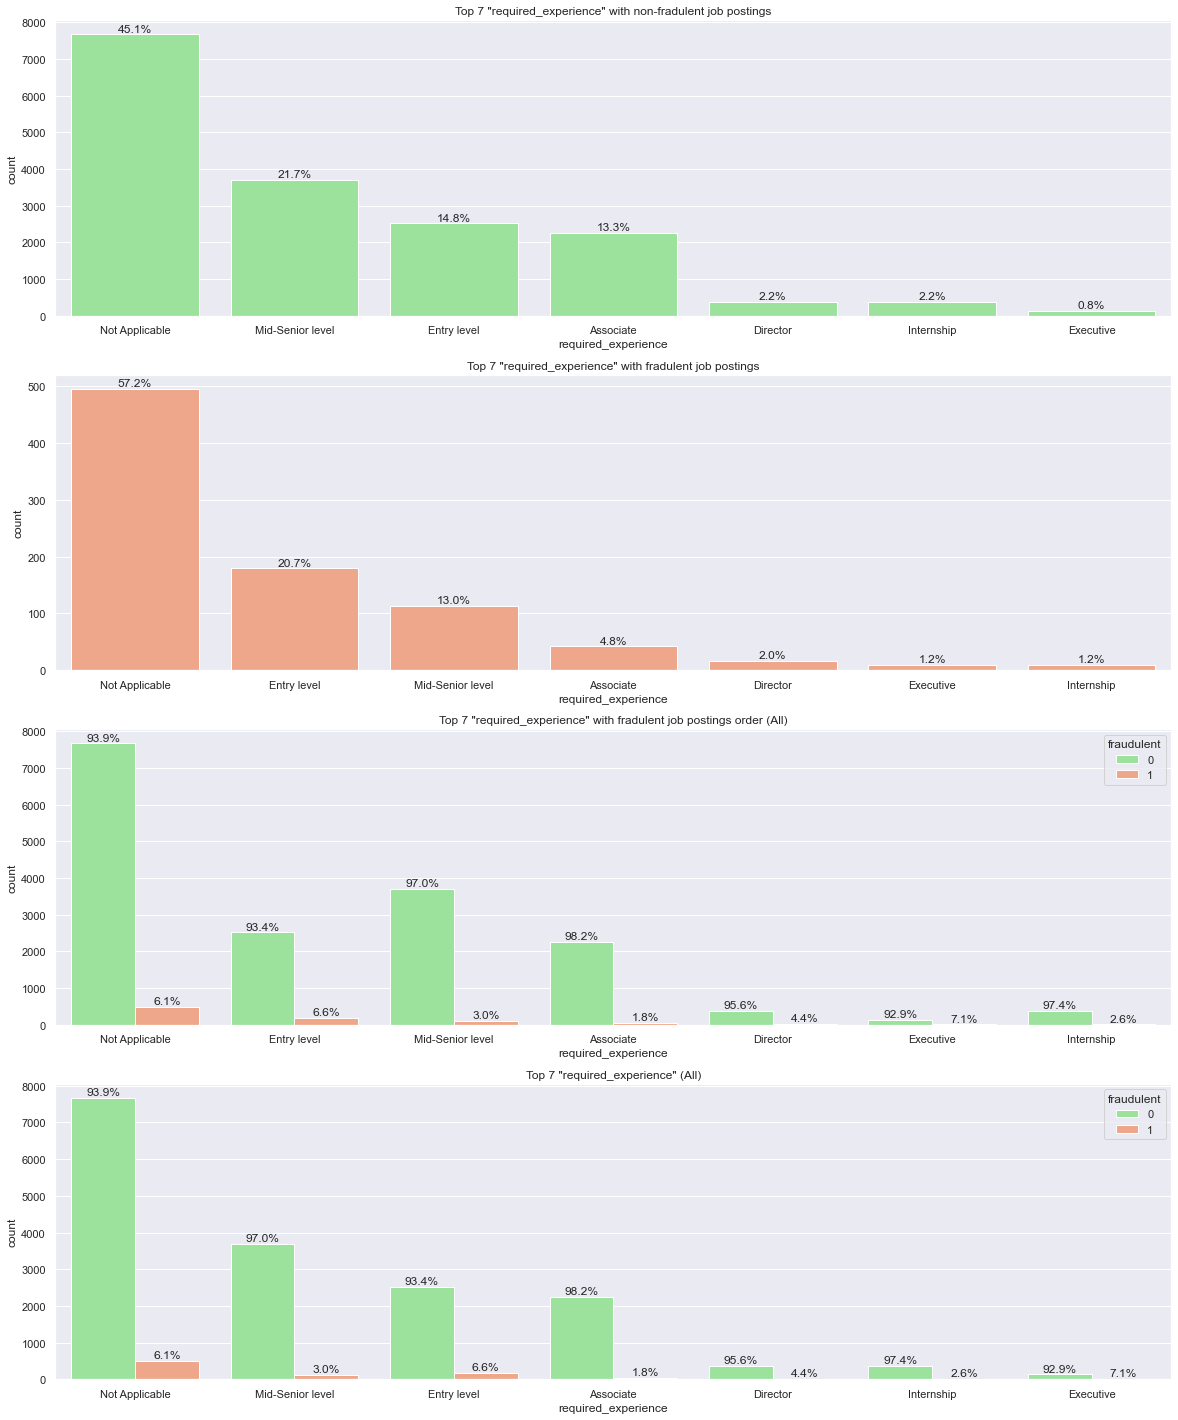

In [448]:
plotCategoricalCountPlot("required_experience", limit=7)

**Observations:**
- Most of the job listings do not require experience (i.e. `Not Applicable`) (45.7%)
- Job listings with with `Executive`, `Entry level`, and `Not Applicable` have a higher chance of being a scam compared to other levels of `required_experience`

#### 2.3.9 Required Education

In [322]:
print("Number of unique values:", job_eda_df["required_education"].nunique())

Number of unique values: 14


Since there are 14 unique values of `requried_education`, we will only see the top 10 in terms of frequency.

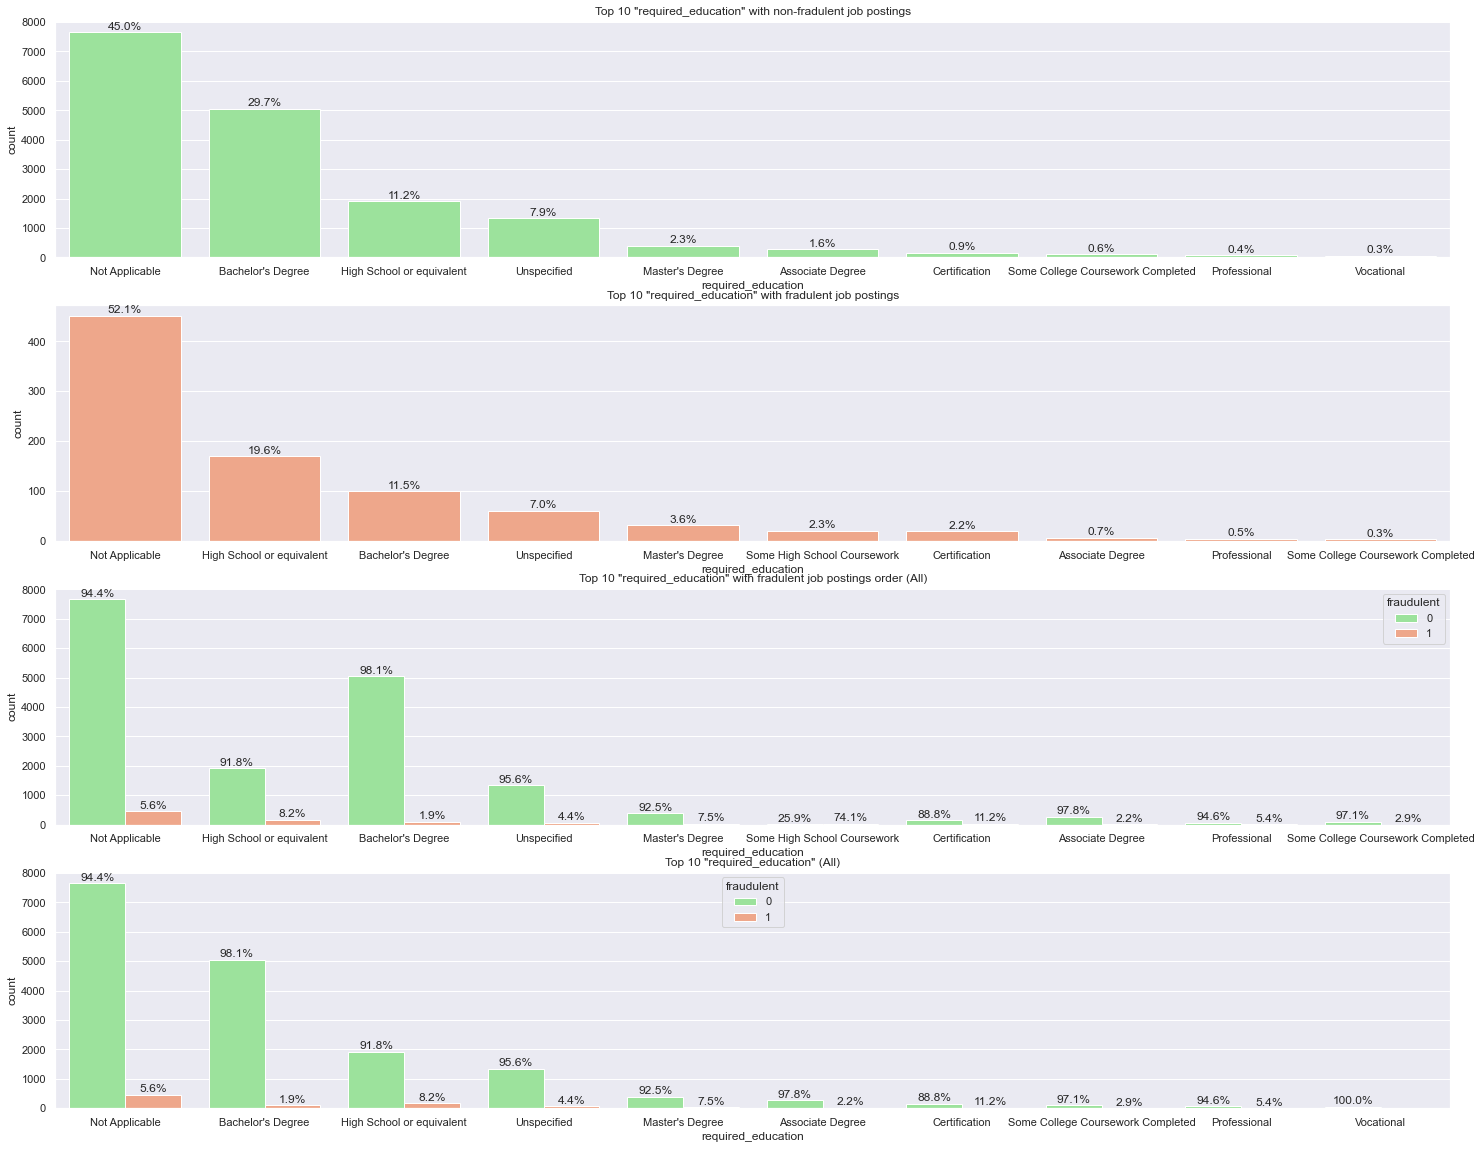

In [451]:
plotCategoricalCountPlot("required_education", limit=10, figsize=(25, 20))

**Observations:**
- Job listings that only require `Some High School Coursework` has an extremely significant chance of being a scam compared to other `required_education` categories (74.1%)
- Interestingly, job listings with `Vocational` as required education has an extremely high chance of being not a scam (100%)

#### 2.3.10 Industry

In [323]:
print("Number of unique values:", job_eda_df["industry"].nunique())

Number of unique values: 132


Since there are 132 unique values of `industry`, we will only see the top 10 in terms of frequency.

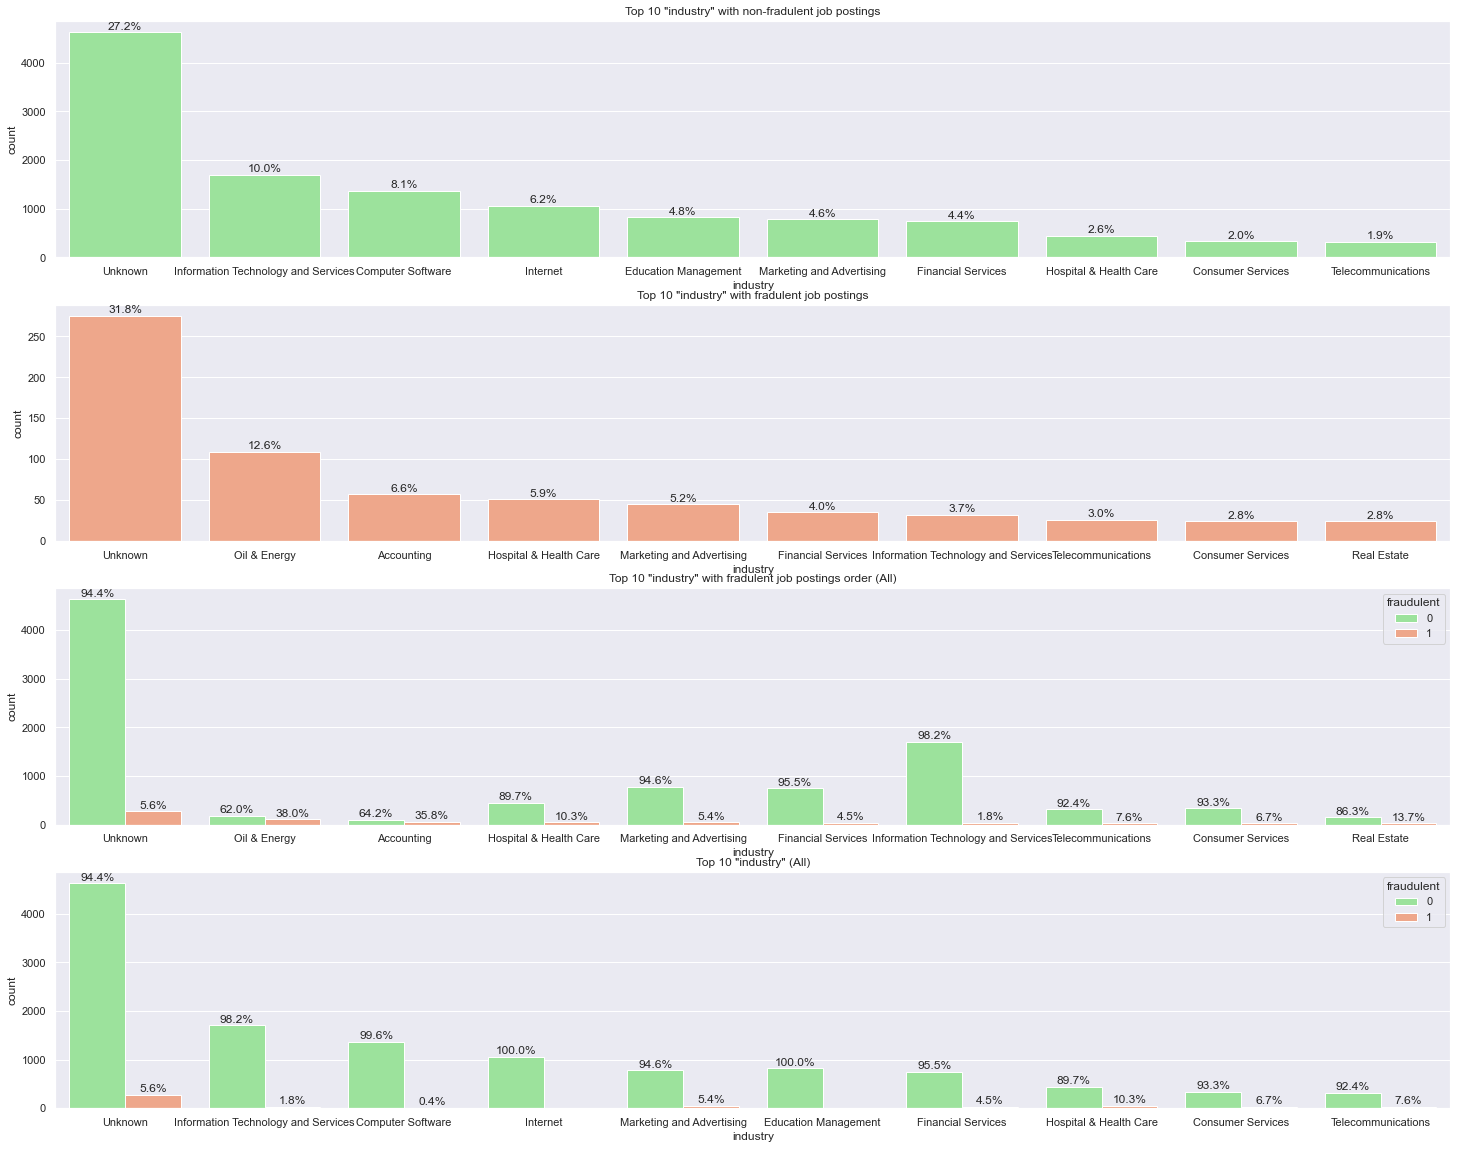

In [452]:
plotCategoricalCountPlot("industry", limit=10, figsize=(25, 20))

**Observations:**
- Job listings from `Oil & Energy` or `Accounting` industries have a very high chance of being a scam (28.0% and 25.8%)

#### 2.3.11 Function

In [324]:
print("Number of unique values:", job_eda_df["function"].nunique())

Number of unique values: 38


Since there are 38 unique values of `function`, we will only see the top 10 in terms of frequency.

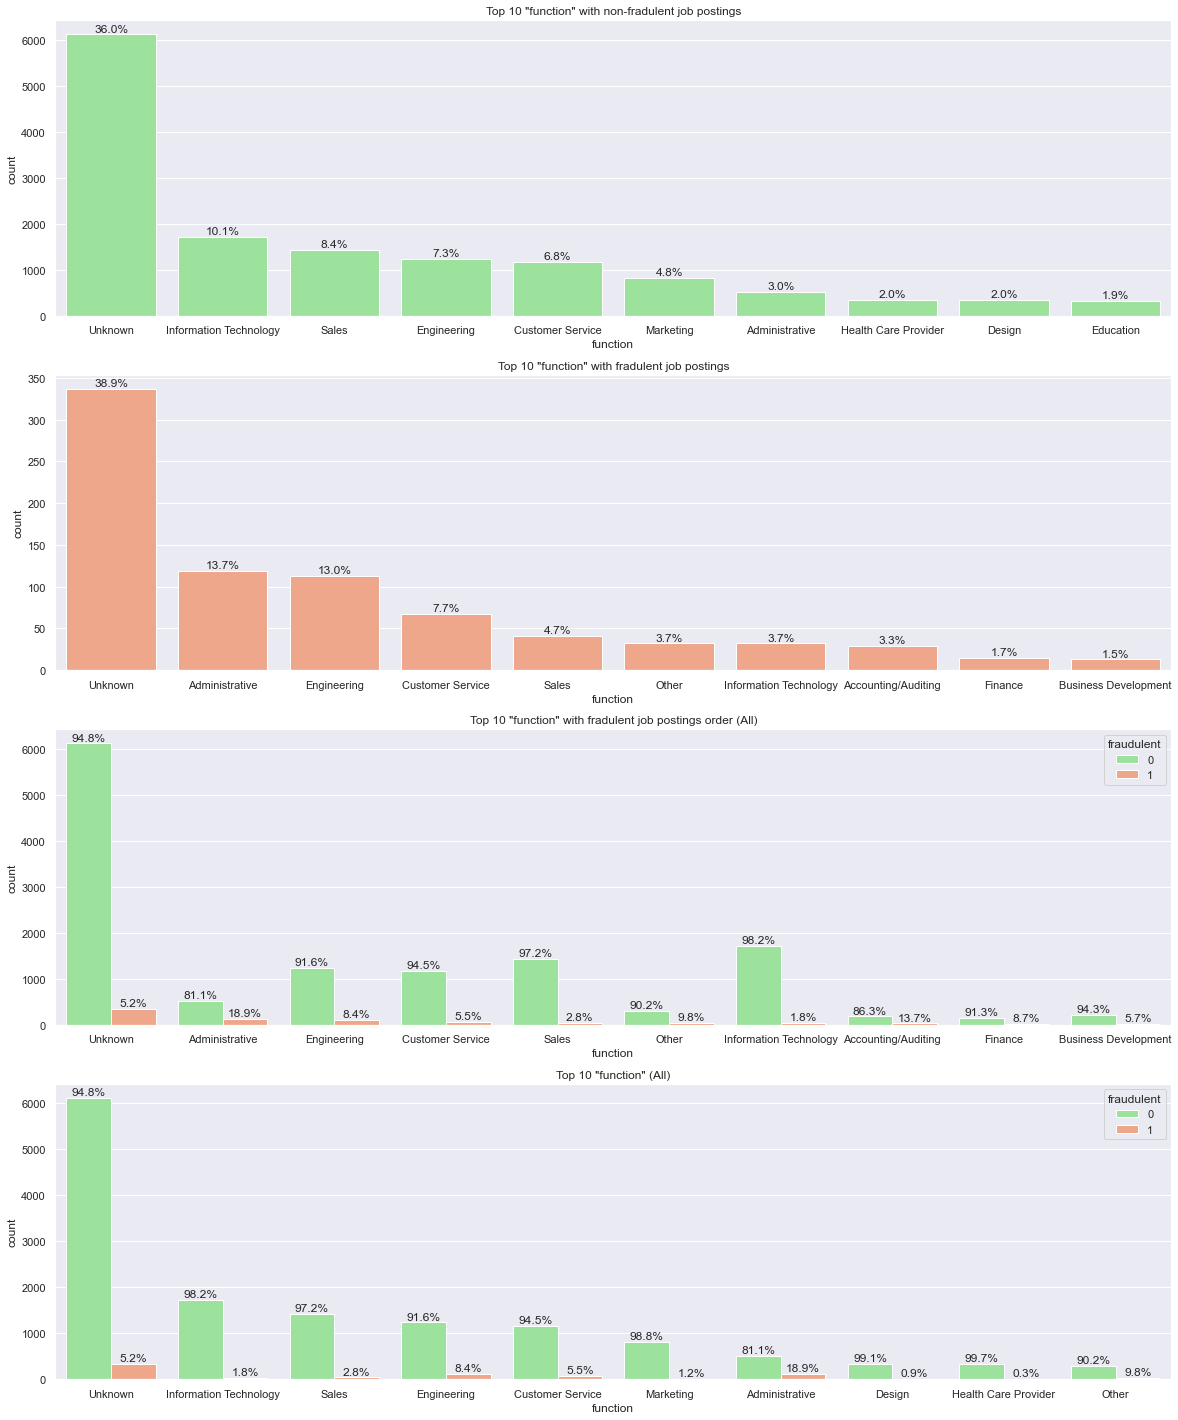

In [453]:
plotCategoricalCountPlot("function", limit=10)

**Observations:**
- Job listings with `Administrative` or `Accounting/Auditing` job functions have a very high chance of being a scam (18.9% and 13.7%)

## 4) Summary on Key EDA Insights

### 4.1 Observations - Response Variable (`fraudulent`)

- The distribution of the predictor variable `fraudulent` is highly unbalanced: 95.16% of rows being non-fraudulent, and 4.84% of rows being fraudulent. Therefore, the trainset should be oversampled to ensure an even distribution of the values of `fraudulent` before commencing model training.

### 4.2 Observations - Categorical Predictor Variables


**`location`:**
- Most of the job listings are from `US, TX, Houston` (10.6%)
- Job listings from `US, CA, Bakersfield` and `US, TX, AUSTIN` have a very high chance of being a scam (100% and 92.3%)
- Job listings from `GB, LND, London` has an extremely low chance of being a scam (99.7%)


**`department`:**
- Most of the job listings have `Unknown` departments regardless of whether it is fraudulent or not (~60%)
- A sizable number of job listings have `Engineering` department (5.3%) (excluding `Unknown` department)
- Job listings with `Clerical` and `Oil & Energy` departments have a very high chance of being a scam (both 100%)
- Job listings with `Unkwown` departments suprisingly has a low chance of being a scam (95.4%)

**`salary_range`:**
- Most of the job listings have `Unknown` salary range regardless of whether it is fraudulent or not (~80%)
- Job listings with large salary range of `7200-1380000` and `250000-50000` salary range have a very high chance of being a scam (both 100%)
- Job listings with `Unkwown` and `0-0` salary range suprisingly has a low chance of being a scam (95.7% and 97.2%)

**`telecommuting`:**
- Most of the job listings does not have `telecommuting` (95.7%)
- A job listing that has `telecommuting` is about 2 times more likely to be a scam compared to a job listing without `telecommuting` (8.3% vs 4.7%)

**`has_company_logo`:**
- Most of the job listings `has a company logo` (79.5%)
- Most of the job listings that are not fraudulent `has a company logo` (67.3%)
- Most of the job listings that are fraudulent `does not have a company logo` (81.9%)
- A job listing that `does not have a company logo` has a significantly higher chance of being a scam compared to that that `has a company logo` (15.9% vs 2.0%)

**`has_question`:**
- There is an even distribution of `has_question` for fraudulent and non-fraudulent job listings.
- A job listing that `does not have question` is about 2.5 times more likely to be a scam compared to that that `has_question` (6.8% vs 2.8%)

**`employment_type`:**
- Most of the job listings has an employment type of `Full-time`.
- Job listings with employment types of `Part-time` and `Unknown` have significantly have chance of being a scam (9.3% and 6.9%).

**`required_experience`:**
- Most of the job listings do not require experience (i.e. `Not Applicable`) (45.7%)
- Job listings with with `Executive`, `Entry level`, and `Not Applicable` have a higher chance of being a scam compared to other levels of `required_experience`

**`required_education`:**
- Job listings that only require `Some High School Coursework` has an extremely significant chance of being a scam compared to other `required_education` categories (74.1%)
- Interestingly, job listings with `Vocational` as required education has an extremely high chance of being not a scam (100%)

**`industry`:**
- Job listings from `Oil & Energy` or `Accounting` industries have a very high chance of being a scam (28.0% and 25.8%)

**`function`:**
- Job listings with `Administrative` or `Accounting/Auditing` job functions have a very high chance of being a scam (18.9% and 13.7%)